## Problem I

    How would you approximate the first and second derivatives of a function from its representation {f(xi)} on the grid using finite differences? Calculate and verify using matplotlib that your numerical derivatives are correct.

## Finite Difference Approximation of First-Order Derivatives

We assume that the functions $f(x)$ is represented by its values at the discrete set of points:
$$x_i = x_1 + i\Delta x \hspace{2cm} i = 0,1, \cdots ,N$$
$\Delta x$ being the grid spacing. 

The finite difference approximation of the first order derivative of the function $f(x)$ at the grid point j can be expressed as:
$${\left[\frac{df(x)}{dx}\right]}_i \approx \frac{1}{\Delta x}[f(x_{i+1}) - f(x_i)]$$

## Finite Difference Approximation of Second-Order Derivatives

The finite difference approximation of the first order derivative of the function $f(x)$ at the grid point j can be expressed as:
$${\left[\frac{d^2f(x)}{dx^2}\right]}_i \approx \frac{1}{\Delta x}\left[\left(\frac{f(x_{i+1}) - f(x_i)}{\Delta x}\right) - \left(\frac{f(x_i) - f(x_{i-1})}{\Delta x}\right)\right]$$

$${\left[\frac{d^2f(x)}{dx^2}\right]}_i \approx \frac{1}{{(\Delta x)}^2}\left[\left(f(x_{i+1}) - 2(f(x_i) + f(x_{i-1})\right)\right]$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

In [2]:
# This is a functional approach to calculate the first and second derivative. 
# Inorder to use this approach, we need a function.

def derivative(f, a=0, h=0.01):
    '''
    Returns the first-derivative of function f using forward difference method

            Parameters:
                    f (array): function
                    a (float): initial value
                    h (float): step size

            Returns:
                    first-derivative of function f(array)
    '''
    return (f(a + h) - f(a))/(2*h)


def second_derivative(f, a=0, h=0.01):
    '''
    Returns the second-derivative of function f

            Parameters:
                    f (array): function
                    a (float): initial value
                    h (float): step size

            Returns:
                    secnd-derivative of function f(array)
    '''
    return (f(a - h) - 2*f(a) + f(a + h))/(h ** 2)


def f(x):
    return np.sin(x)  # f(x) = sin(x)

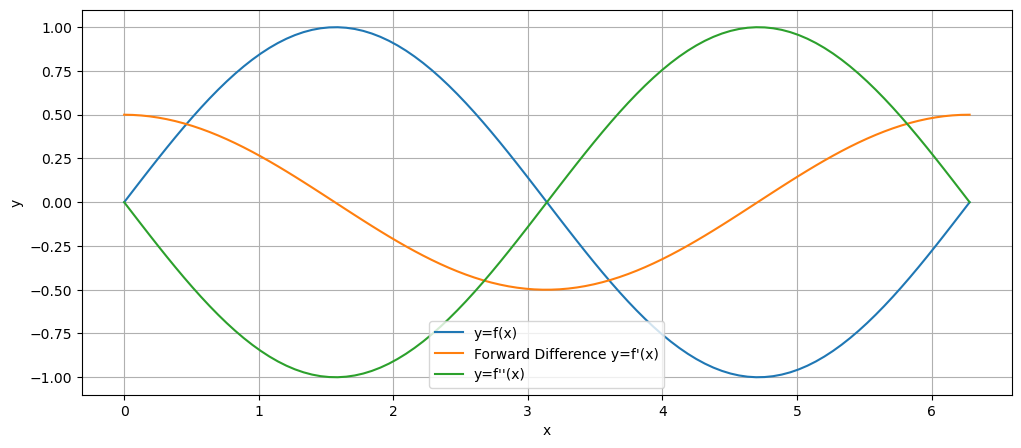

In [3]:
L = 2 * np.pi
N = 100
x = np.linspace(0, L, N)
y = f(x)
h = 0.05
dydx = derivative(f,x)
ddx = second_derivative(f,x)

plt.figure(figsize=(12,5))
plt.plot(x,y,label='y=f(x)')
plt.plot(x,dydx,label="Forward Difference y=f'(x)")
plt.plot(x,ddx,label="y=f''(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.show()

## Operator Form of first derivative.

$$D_{ij} = \frac{\delta_{i+1} - \delta_{i,j}}{h}$$

$${\left(\frac{dy}{dx}\right)}_i = D_{ij} y_j$$

## Operator Form of second derivative.

$$D_{ij}^2 = \frac{\delta_{i+1,j} -2\delta{i,j} + \delta_{i-1,j}}{h^2}$$

In [4]:
def D(x, N=100):
    '''
    Returns the operator form of first-derivative

            Parameters:
                    x (array): grid of 1D array
                    N (int): number of points on the grid

            Returns:
                    D (array): first-derivative operator
    '''
    h = x[1] - x[0]
    k = [np.ones(N-1), -np.ones(N-1)]
    offset = [1, -1]
    D = diags(k, offset).toarray()
    D = D/(2 * h)
    # # Boundary values where it is not well defined
    D[0, 0] = 0
    D[0, 1] = 0
    D[1, 0] = 0
    D[N-1, N-2] = 0
    D[N-2, N-1] = 0
    D[N-1, N-1] = 0
    return D


def D2(x, N=100):
    '''
    Returns the operator form of second-derivative

            Parameters:
                    x (array): grid of 1D array
                    N (int): number of points on the grid

            Returns:
                    D (array): first-derivative operator
    '''
    h = x[1] - x[0]
    k1 = [np.ones(N-1), -2*np.ones(N), np.ones(N-1)]
    offset = [-1, 0, 1]
    D2 = diags(k1, offset).toarray()
    D2 = D2/(h ** 2)
    # Boundary values where it is not well defined
    D2[0, 0] = 0
    D2[0, 1] = 0
    D2[1, 0] = 0
    D2[N-1, N-2] = 0
    D2[N-2, N-1] = 0
    D2[N-1, N-1] = 0
    return D2

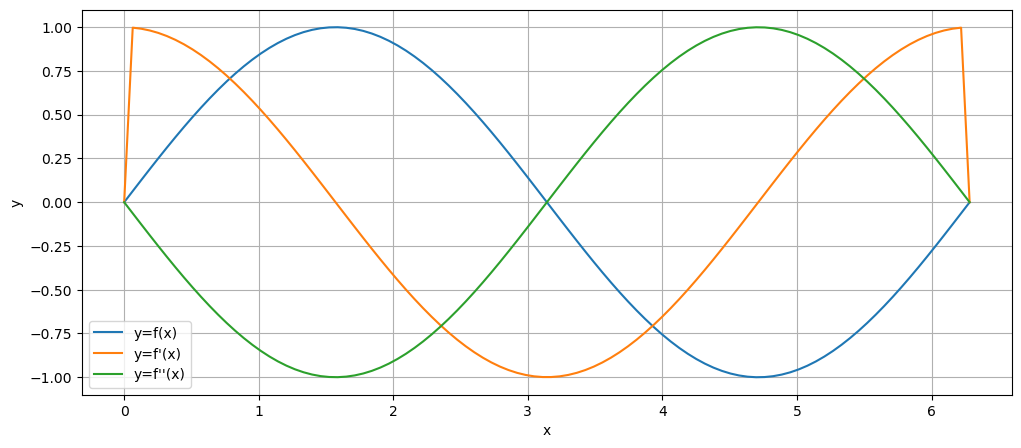

In [5]:
L = 2 * np.pi
N = 100
x = np.linspace(0, L, N)
y = f(x)
dydx = np.dot(D(x, N), y)
ddx = np.dot(D2(x, N), y)

plt.figure(figsize=(12,5))
plt.plot(x, y, label='y=f(x)')
plt.plot(x, dydx, label="y=f'(x)")
plt.plot(x, ddx, label="y=f''(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.show()